<a href="https://colab.research.google.com/github/faruk17035/3rd-Work/blob/main/Copy_of_set4_PAAC%2BUbiquitin%2BSVM_labpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv
file_name = '/content/drive/MyDrive/data/set4/AAINDEX_set4.csv'
df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A14329,A14330,A14331,A14332,A14333,A14334,A14335,A14336,A14337,Target
0,4.37,0.00,0.72,0.51,0.44,0.72,0.64,0.493,89.7,-73,...,3.83,-7.92,-1.89,-0.31,-0.33,-0.34,-0.28,-3.1,-4.81,1
1,4.17,1.53,3.23,2.93,1.00,0.83,0.53,0.365,102.0,145,...,3.83,-7.92,-1.89,-0.31,-0.33,-0.34,-0.28,-3.1,-4.81,1
2,4.66,2.02,1.96,2.03,0.60,0.98,0.53,0.314,113.9,189,...,3.67,-7.96,-2.22,-0.36,-0.34,-0.38,-0.33,-3.7,-4.65,1
3,4.50,0.05,0.97,0.81,0.35,0.55,0.84,0.507,54.9,-70,...,-2.31,3.88,0.56,0.09,0.13,0.14,0.15,4.1,1.52,1
4,4.76,0.46,0.05,0.14,0.44,0.65,0.97,0.511,68.4,-78,...,-2.35,4.04,0.74,0.12,0.23,0.23,0.21,8.2,2.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,3.95,2.22,1.45,1.67,0.73,0.98,0.37,0.462,102.0,151,...,-1.97,4.02,0.25,0.04,0.01,0.03,0.05,-1.2,0.78,0
4604,4.70,2.65,0.77,1.08,0.73,0.77,0.97,0.305,135.4,145,...,3.83,-7.92,-1.89,-0.31,-0.33,-0.34,-0.28,-3.1,-4.81,0
4605,4.76,0.46,0.05,0.14,0.44,0.65,0.97,0.511,68.4,-78,...,-2.35,4.04,0.74,0.12,0.23,0.23,0.21,8.2,2.30,0
4606,4.17,1.53,3.23,2.93,1.00,0.83,0.53,0.365,102.0,145,...,1.78,-4.47,-0.96,-0.16,-0.36,-0.38,-0.32,-2.0,-6.04,0


In [4]:
df.shape

(4608, 14338)

In [5]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(4608, 14337)
(4608,)


Text(0, 0.5, 'Frequency')

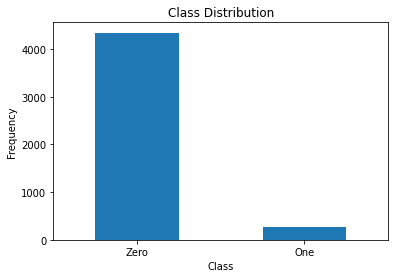

In [6]:
count_classes = pd.value_counts(df['Target'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
One = df[df['Target']==1]

Zero = df[df['Target']==0]

In [8]:
print(Zero.shape,One.shape)

(4345, 14338) (263, 14338)


## Applying ADASYN

In [9]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 50)
X_res,y_res=sm.fit_resample(X,Y)

In [10]:
print(X_res.shape)
print(y_res.shape)

(8659, 14337)
(8659,)


In [11]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [13]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C=10,gamma=0.001, probability=True)
#classifier = SVC()

In [ ]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[342  92]
 [ 53 374]]


0.8315911730545877

In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_test,y_pred))

AUC =  0.9742159137436878


In [ ]:
 from sklearn.metrics import matthews_corrcoef,confusion_matrix
matthews_corrcoef(y_test,y_pred)

0.9488463179400867

In [ ]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 409
True Negatives: 425
False Positives: 16
False Negatives: 6


In [ ]:
sensitivity=(TP/(TP+FN))
sensitivity

0.9855421686746988

In [ ]:
specificity = (TN/(TN+FP))
specificity

0.963718820861678

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.29 %
Standard Deviation: 2.11 %


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = cross_val_predict(classifier, X_train, y_train, cv=10)
cmann = confusion_matrix(y_train, y_pred)
print(cmann)
accuracy = (cmann[0][0]+cmann[1][1])/(cmann[0][1] + cmann[1][0] +cmann[0][0] +cmann[1][1]) 
print(accuracy*100)
ACC = accuracy_score(y_train,y_pred)
print(ACC)

[[383  19]
 [  2 371]]
97.29032258064517
0.9729032258064516


In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_train,y_pred))

AUC =  0.973687194056527


In [ ]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
#matthews_corrcoef(y_test,y_pred)
matthews_corrcoef(y_train,y_pred)

0.9467305983559786

In [ ]:
TP = cmann[0][0]
TN = cmann[1][1]
FP = cmann[0][1]
FN = cmann[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 383
True Negatives: 371
False Positives: 19
False Negatives: 2


In [ ]:
sensitivity=(TP/(TP+FN))
sensitivity

0.9948051948051948

In [ ]:
specificity = (TN/(TN+FP))
specificity

0.9512820512820512

In [ ]:
precision = (TP/(TP+FP))
recall = (TP/(TP+FN))
print(precision)
print(recall)

0.9527363184079602
0.9948051948051948


In [ ]:
f1 = (2*(precision*recall))/(precision+recall)
f1

0.9733163913595935